This is a quick binary classification problem using the PIMA Indians diabetes dataset. This is a supervised machine learning problem with eight input variables and one output variable. 

I will walk through loading the dataset, data-cleaning and pre-processing techniques, no feature removal will be conducted. I will finish up with a yeo-johnson transformation and run a series of common machine learning classifiers that generally work well with binary classification problems.  

1. Load Dataset 
2. Pre-processing Data: Check size, descriptive stats, clean data, fill missing values, etc... 
3. Data Visualizations 
4. Feature Engineering 
5. Create Training/Testing Datasets 
6. Build and score models by trainning on the training dataset 
7. Model prediction and scoring using test data 


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
import sklearn as skl
import seaborn as sns 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Load Dataset**

In [3]:
names = ['Pregnancies','Glucose','BP','SkinThick','Insulin','BMI','DiaPedFunction','Age','Outcome']
dataset = pd.read_csv('/content/drive/MyDrive/Classes/Fall 2021/diabetes.csv', names=names, header=0)
dataset 

,Pregnancies,Glucose,BP,SkinThick,Insulin,BMI,DiaPedFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**2. Pre-process Data: Check size, shape, descriptive stats, clean and fill missing values, etc...**

In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.describe()

,Pregnancies,Glucose,BP,SkinThick,Insulin,BMI,DiaPedFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's check for zeros and other null then replace them. I will use the distributions above to determine the values to replace the missing numbers with. If the mean is not centrally located or near the median then the median value will be used to replace the null value. This way the mean will be dragged more centrally. If the mean is more centrally located then the mean will be used to replace the missing values. 

In [6]:
print((dataset==0).sum())
dataset.dtypes

Pregnancies       111
Glucose             5
BP                 35
SkinThick         227
Insulin           374
BMI                11
DiaPedFunction      0
Age                 0
Outcome           500
dtype: int64


Pregnancies         int64
Glucose             int64
BP                  int64
SkinThick           int64
Insulin             int64
BMI               float64
DiaPedFunction    float64
Age                 int64
Outcome             int64
dtype: object

In [7]:
374/768

0.4869791666666667

- Having zero pregnancies might make sense, but having no glucose, blood pressure, skin thickness, insulin, or BMI does not

- A little under half of the data for insulin are null values or zeros. Can the dataset be truly representative of the population if there are this many missing values? I say no. 
 - At the end of the day, I replaced the missing values and was still able to get a decent prediction accuracy, however, in the future, if we obtain low accuracies then dropping a variable with high missing values would be a good idea. 

In [8]:
#Change all zeros to nulls
dataset.replace(0, np.nan, inplace=True)
#Replace all non-logical nulls with either variable means or medians 
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace=True)
dataset['BP'].fillna(dataset['BP'].mean(), inplace=True)
dataset['SkinThick'].fillna(dataset['SkinThick'].mean(), inplace=True)
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace=True)
dataset['BMI'].fillna(dataset['BMI'].mean(), inplace=True)
#Restore dataset with nulls going back to their logical zeros (like having a zero for outcome)
dataset.replace(np.nan, 0, inplace=True)

In [9]:
dataset.describe()
#Let's re-evaluate the dataset and make sure there are no zeros where they
#should not be.
#Everything looks good so we proceed! 

,Pregnancies,Glucose,BP,SkinThick,Insulin,BMI,DiaPedFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**3. Data Visualizations**

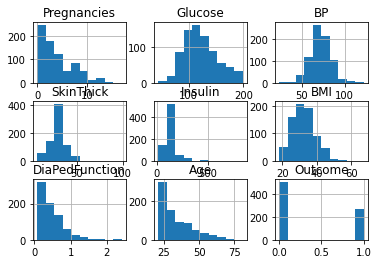

In [10]:
dataset.hist()
plt.show()

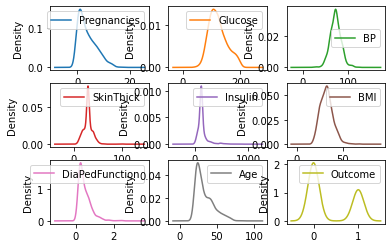

In [11]:
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
#Dataset after missing value replacement 
plt.show()

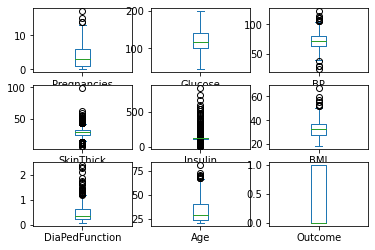

<Figure size 432x288 with 0 Axes>

In [12]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.figure()
plt.show()

**4. Feature Engineering** 

We notice there are a lot of outliers in the data as well as non-normal distributions amongst variables.


Let's normalize all of the data such that the mean wiil equal zero and the standard deviation is 1.  Normalizing and scaling data are good techniques for acheiving more accurate machine learning algorithms as they take away any preferances towards larger distances in data.

In [13]:
array = dataset.values
inputs = array[:,:8]
output = array[:,8:]

In [14]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [15]:
yj = PowerTransformer('yeo-johnson')
yjj = yj.fit(inputs)
yj_input = yjj.transform(inputs)

yj_dataset = pd.DataFrame(np.concatenate((yj_input,output), axis=1), columns=names)

print(yjj.lambdas_)
yj_dataset

[ 0.17272363  0.08947041  0.90385374  0.63433341  0.05220754  0.06538882
 -2.25038684 -1.14960183]


,Pregnancies,Glucose,BP,SkinThick,Insulin,BMI,DiaPedFunction,Age,Outcome
0,0.813399,0.906844,-0.025468,0.696814,0.005606,0.260117,0.821764,1.364180,1.0
1,-0.833906,-1.305900,-0.523565,0.036596,0.005606,-0.843284,-0.168409,0.126452,0.0
2,1.188996,1.785634,-0.690534,0.054048,0.005606,-1.457745,0.935284,0.230161,1.0
3,-0.833906,-1.126963,-0.523565,-0.674132,-0.562125,-0.586404,-1.298725,-1.480075,0.0
4,-1.603317,0.591500,-2.738739,0.696814,0.604821,1.462682,2.336680,0.327328,1.0
...,...,...,...,...,...,...,...,...,...
763,1.500834,-0.630553,0.304394,2.002547,0.746145,0.159674,-1.267837,1.765331,0.0
764,-0.339229,0.122401,-0.191046,-0.193988,0.005606,0.696370,-0.222191,-0.368619,0.0
765,0.590955,0.089305,-0.025468,-0.674132,-0.214301,-0.913989,-0.753116,0.015535,0.0
766,-0.833906,0.252381,-1.025974,0.054048,0.005606,-0.262506,-0.178081,1.238144,1.0


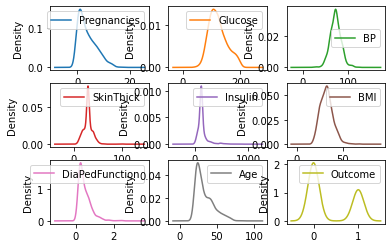

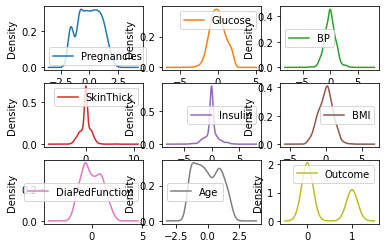

In [16]:
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
yj_dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

plt.show()
#Comparison between the original dataset and the dataset with Yeo-johnson transformation 

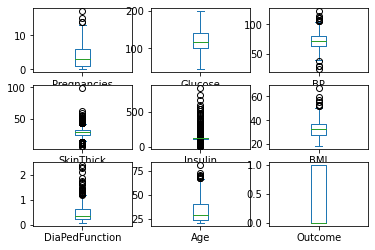

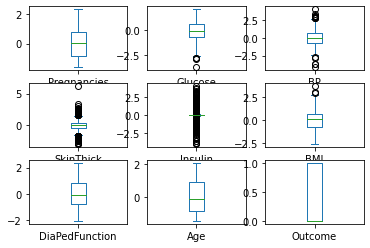

In [17]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
yj_dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

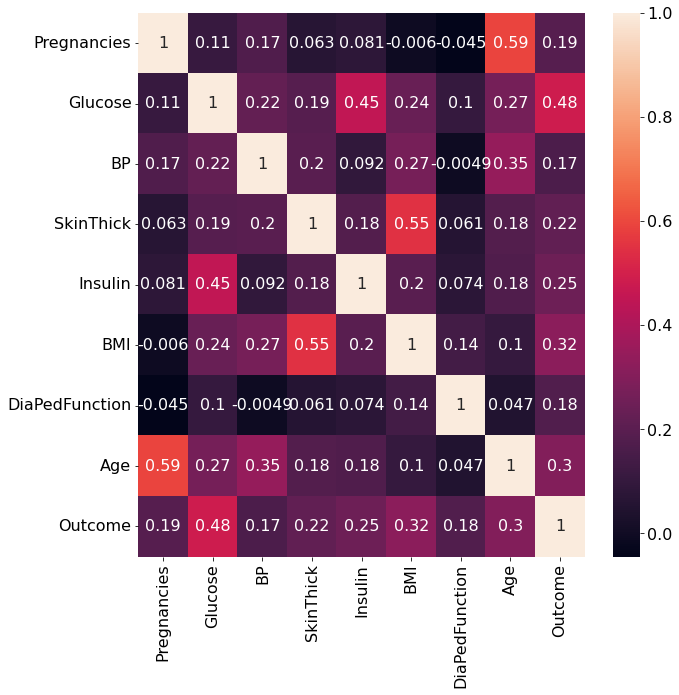

In [18]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '16'
cor = yj_dataset.corr()
sns.heatmap(cor, annot=True)

**5. Create Training/Testing Dataset**

We have defined our inputs and outputs above when we performed our Yeo-Johnson transofrmation. Now all we have to do is split up and randomize our train/test datasets.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(yj_input,output,test_size=0.2, random_state=1)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
from sklearn.utils import multiclass
models = []
models.append(('LogR', LogisticRegression(solver='liblinear')))
#Logistic Regression usually works best for binary classification problems  
models.append(('LDA',LinearDiscriminantAnalysis(n_components=1)))
models.append(('KNN', KNeighborsClassifier(algorithm='brute')))
models.append(('DTrees', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM_linear', SVC(gamma='auto', kernel='linear')))

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

**6. Build and score models by training on the training dataset**

In [23]:
results = []
clf_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
  results.append(cv_results)
  clf_names.append(name)
  print('%s: %f (%f)' % (name,cv_results.mean(), cv_results.std()))

LogR: 0.752750 (0.057311)
LDA: 0.756002 (0.058860)
KNN: 0.723083 (0.080363)
DTrees: 0.669619 (0.060554)
NB: 0.755764 (0.053461)
SVM_linear: 0.754363 (0.053385)


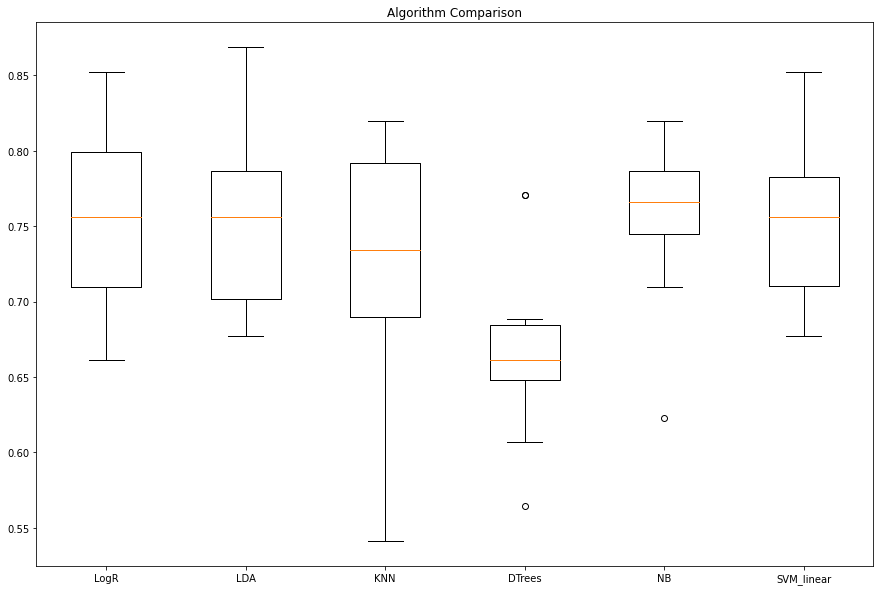

In [24]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 10})
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.boxplot(results, labels=clf_names)
plt.title('Algorithm Comparison')
plt.show()

As we can see from the above accuracy scores and model comparison chart, linear discriminant analysis obtains our best training accuracy with an accuracy of 75.6%.

- Also, notice Naive Bayes classifier also has a similar accuracy of 75.5%. This is because Linear Discriminant Analysis also uses Bayes' Theorem to estimate the probability of an observation belonging to a particular output class. The difference is miniscule, however, we will continue on with using the LDA classifier. 


 We will create a confusion matrix using LDA in order to find precision, recall, and specificity stats.  

**7. Model prediction and scoring using test data**

In [25]:
LDA = LinearDiscriminantAnalysis()
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
LDA_clf = LDA.fit(x_train, y_train.ravel())
cv_results = cross_val_score(LDA_clf,x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
print('LDA w/ Yeo-Johnson Transformation. No variable removal')
print('%f (%f)'% (cv_results.mean(), cv_results.std()))
y_pred = LDA.predict(x_val)
skl.metrics.confusion_matrix(y_val, y_pred)

LDA w/ Yeo-Johnson Transformation. No variable removal
0.756002 (0.058860)


array([[87, 12],
       [20, 35]])

In [26]:
Precision = (87/(87+12))
#PPV (Positive Predictive Value)
Precision

0.8787878787878788

In [27]:
Recall = (87/(87+20))
#Recall or Hit Rate or TPR (True Positive Rate) 
Recall

0.8130841121495327

In [28]:
Specificity = (35/(35+12))
#TNR (True Negative Rate) 
Specificity

0.7446808510638298

In [29]:
Miss = 1 - Recall
#Miss Rate or False Negative Rate (FNR)
Miss

0.1869158878504673

In [30]:
ACC = (87+35)/(87+12+20+35)
#Overall accuracy when exposed to new data 
ACC

0.7922077922077922

Nice so we have obtained an evaluation accuracy of 79.2%. That's not too terrible and considering we did no heavy feature engineering on this, I say it's pretty good. If I were to perfect this, in the future, I would maybe pursue PCA prior to performing my Linear Discriminant Analysis just to see if we can regularize the data in order ot maximize class separability. 